# Medical insurance stats

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt

In [3]:
# Load csv file 
df = pd.read_csv('../datasets/insurance.csv', index_col=False)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
y, X = dmatrices('charges ~ age + sex + bmi + children + smoker + region', data=df, return_type='dataframe')

In [5]:
X[:3]

,Intercept,sex[T.male],smoker[T.yes],region[T.northwest],region[T.southeast],region[T.southwest],age,bmi,children
0,1.0,0.0,1.0,0.0,0.0,1.0,19.0,27.90,0.0
1,1.0,1.0,0.0,0.0,1.0,0.0,18.0,33.77,1.0
2,1.0,1.0,0.0,0.0,1.0,0.0,28.0,33.00,3.0


In [6]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:49:40   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    

## Age

eval_env: 1


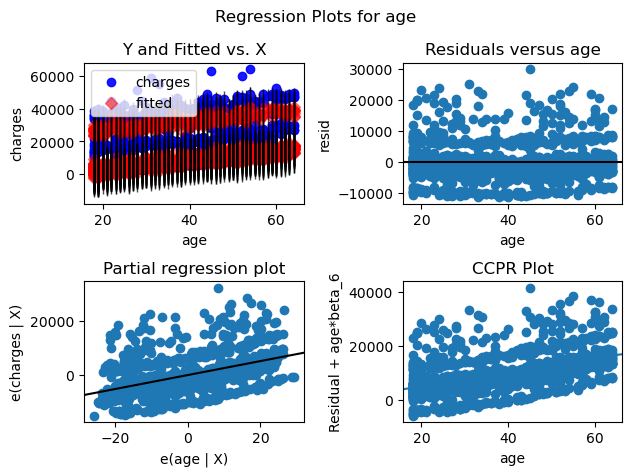

In [14]:
fig = sm.graphics.plot_regress_exog(res, "age")
fig.tight_layout(pad=1.0)

## Sex

eval_env: 1


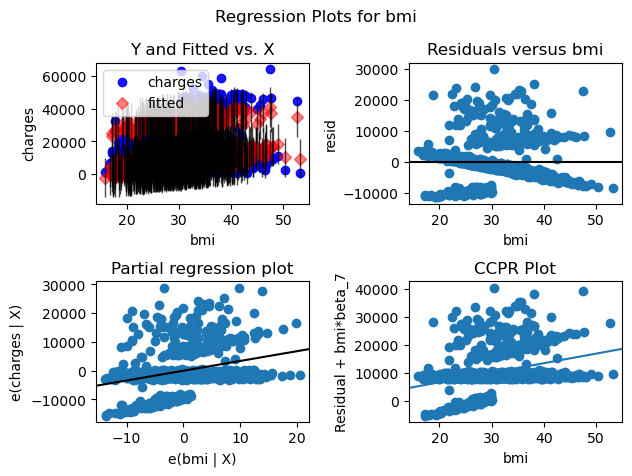

In [17]:
fig = sm.graphics.plot_regress_exog(res, "bmi")
fig.tight_layout(pad=1.0)

## Children

eval_env: 1


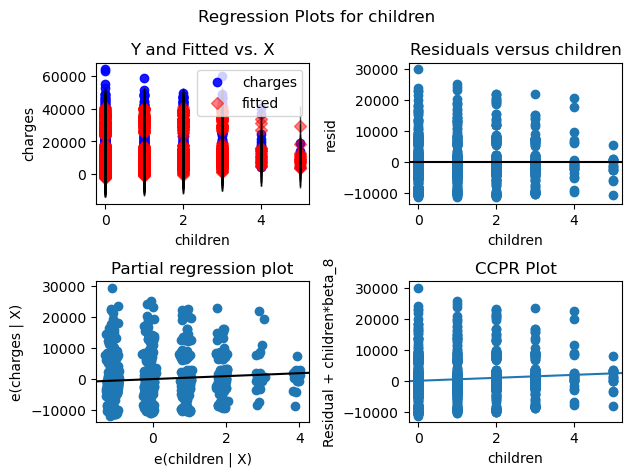

In [18]:
fig = sm.graphics.plot_regress_exog(res, "children")
fig.tight_layout(pad=1.0)

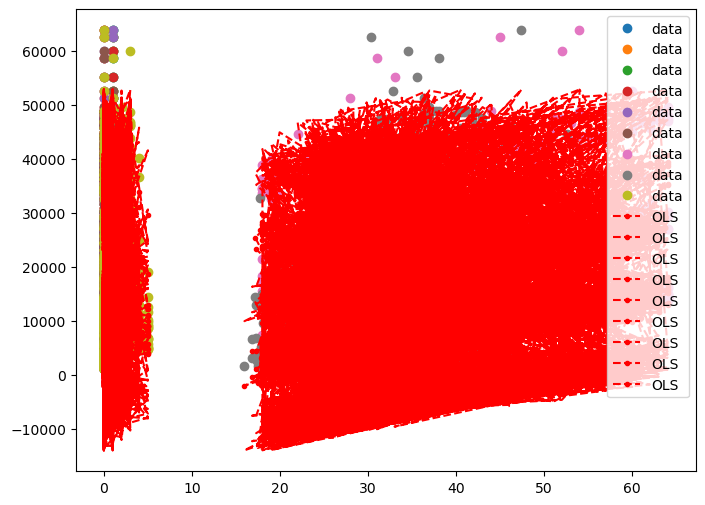

In [21]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(X, y, "o", label="data")
#ax.plot(X, y_true, "b-", label="True")
ax.plot(X, res.fittedvalues, "r--.", label="OLS")
ax.plot(X, iv_u, "r--")
ax.plot(X, iv_l, "r--")
ax.legend(loc="best")